NameError: name 'OrderedDict' is not defined

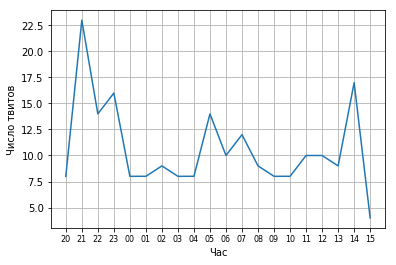

In [4]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
from db_connect import Tweet
from collections import OrderedDict


def time_delta(data, delta=datetime.timedelta(hours=1)):
    result = OrderedDict()
    date_format = '%H'
    date = data[0] + delta
    item = 0
    while item < len(data):
        if data[item] <= date:
            if not date.strftime(date_format) in result:
                result[date.strftime(date_format)] = 0
            result[date.strftime(date_format)] += 1
            item += 1
        else:
            date = date + delta
    return result

# Активность пользователей за последние сутки
%matplotlib inline


limit = datetime.datetime.now() - datetime.timedelta(days=1)
rows = Tweet.select()
timeline = []
for item in rows:
    if item.created > limit:
        timeline.append(item.created)
timeline.sort()

data = time_delta(timeline)

x = []
l = []
for key, value in data.items():
    l.append(key)
    x.append(value)

figure = plt.figure()
plt.xlabel('Час')
plt.ylabel('Число твитов')
plt.grid(True)

y = np.arange(len(x))
plt.plot(y, x)
plt.xticks(y, l, fontsize=8)
plt.savefig('Test.png', fmt='png')
plt.show()

In [6]:
from db_connect import Tweet, Account
from collections import OrderedDict
# Время последнего твита для каждого пользователя
row = Tweet.select().join(Account).where(Tweet.account == Account.id).order_by(-Tweet.created)
result = OrderedDict()
len_name = 0
for item in row:
    if not str(item.account.name) in result or item.created > result[item.account.name]:
        result[item.account.name] = item.created
    if len_name < len(item.account.name):
        len_name = len(item.account.name)
for key, val in result.items():
    print(key.ljust(len_name), ' : ', val.strftime('%Y.%m.%d %H:%M'))

aliciakeys       :  2017.03.01 14:40
jimmyfallon      :  2017.03.01 14:38
nytimes          :  2017.03.01 14:38
CNN              :  2017.03.01 14:37
cnnbrk           :  2017.03.01 14:34
JLo              :  2017.03.01 14:19
SportsCenter     :  2017.03.01 14:18
espn             :  2017.03.01 14:00
KevinHart4real   :  2017.03.01 11:46
twitter          :  2017.03.01 04:29
wizkhalifa       :  2017.03.01 04:23
ladygaga         :  2017.03.01 03:32
instagram        :  2017.03.01 03:30
britneyspears    :  2017.03.01 02:07
YouTube          :  2017.03.01 02:02
NiallOfficial    :  2017.03.01 01:16
TheEllenShow     :  2017.03.01 00:29
KingJames        :  2017.02.28 23:23
NICKIMINAJ       :  2017.02.28 22:48
Louis_Tomlinson  :  2017.02.28 22:15
pitbull          :  2017.02.28 22:02
ddlovato         :  2017.02.28 22:00
KimKardashian    :  2017.02.28 21:31
jtimberlake      :  2017.02.28 20:14
shakira          :  2017.02.28 19:23
KAKA             :  2017.02.28 17:50
neymarjr         :  2017.02.28 15:42
C

In [6]:
from twitter_api import word_count
from db_connect import Account


def dict_merger(dicts):
    result = {}
    for item in dicts:
        if not item:
            continue
        for key, val in item.items():
            if not str(key) in result:
                result[key] = val
            else:
                result[key] += val
    return result


def max_val(count_dict):
    response = {}
    count = 0
    for key, val in count_dict.items():
        if count < val:
            response = {key: val}
            count = val
    return response


row = Tweet.select().join(Account).where(Tweet.account == Account.id).order_by(-Tweet.created)
result = {}
len_name = 0
for item in row:
    if not str(item.account.name) in result:
        result[item.account.name] = []
    result[item.account.name].append(word_count(item.msg))
    if len_name < len(item.account.name):
        len_name = len(item.account.name)
for key, val in result.items():

    result[key] = dict_merger(val)
    result[key] = max_val(result[key])
    print(key.ljust(len_name), ' : ', result[key])

Louis_Tomlinson  :  {'To': 6}
NICKIMINAJ       :  {'Rt': 11}
Eminem           :  {'The': 11}
SportsCenter     :  {'The': 55}
KAKA             :  {'Que': 8}
YouTube          :  {'The': 21}
taylorswift13    :  {'The': 6}
BarackObama      :  {'The': 18}
justinbieber     :  {'On': 5}
CNN              :  {'The': 70}
KingJames        :  {'The': 23}
aliciakeys       :  {'To': 16}
Oprah            :  {'I': 7}
BrunoMars        :  {'You': 9}
Cristiano        :  {'And': 7}
jtimberlake      :  {'You': 12}
ladygaga         :  {'To': 9}
katyperry        :  {'A': 13}
KimKardashian    :  {'You': 17}
onedirection     :  {'The': 13}
Pink             :  {'To': 12}
NiallOfficial    :  {'To': 15}
jimmyfallon      :  {'And': 16}
instagram        :  {'The': 18}
Drake            :  {'Now': 9}
AvrilLavigne     :  {'I': 12}
shakira          :  {'De': 15}
britneyspears    :  {'The': 9}
espn             :  {'The': 61}
KevinHart4real   :  {'Rt': 15}
wizkhalifa       :  {'You': 12}
LilTunechi       :  {'My': 10}
ri